# Machine Learning: Adult Census Case Study

## Notes on Method

* NumPy
    * python is slow
    * optimized and written in C and FORTRAN
    
    * array()
        * data type
        * shape = (no. rows, no. cols, no. matrices, ..)
        
        * (x, y, c, i)

* Pandas
    * Dataframe = convenient wrapper on an array
    * Feature Engineer = Adding a column
    * Tabluar 

* Matplotlib -- a mess for visualizatioin

* Seaborn -- almost not a mess, for visualization

* Numbers:
    * Real  $  \in \textbf{R}$
       * 0.1 and 0.2
       * Height
       * Weight
       * Distance
    
    * Imaginary = a pair of numbers that satifisfy +/-/* 
    
    * Binary {0, 1}
        * Two-category problem
        * fraud/not fraud
        * <50, >=50
     
        
    * Categorical
        * integers without addition, mult, meanv
        
    * Ordinal
        * categorical + ordering 
        * rank
        * year
        
    * 
    * Rational: Ration
        * 0.5, 1/2
        * continous/real
    

http://archive.ics.uci.edu/ml/datasets/Adult

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/adult/'

cnames = [ 
    'age', 'workclass', 'fnlwgt', 
    'education', 'education-num',
    'marital-status', 'occupation',
    'relationship', 'race', 'sex',
    'capital-gain', 'capital-loss',
    'hours-per-week', 'native-country', 
    'income'
]

df = pd.read_csv(url + 'adult.data', names=cnames)

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [28]:
X = df.drop('income', axis=1)
y = df['income']

X.shape, y.shape

((32561, 14), (32561,))

## Data Exploration

In [29]:
pd.Series(df['occupation'].unique())

0           Adm-clerical
1        Exec-managerial
2      Handlers-cleaners
3         Prof-specialty
4          Other-service
5                  Sales
6           Craft-repair
7       Transport-moving
8        Farming-fishing
9      Machine-op-inspct
10          Tech-support
11                     ?
12       Protective-serv
13          Armed-Forces
14       Priv-house-serv
dtype: object

## Data Preparation: Sketching

In [30]:
X = X.replace({' ?': np.nan})
X.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
dtype: int64

In [31]:
{c: X[c].dtype for c in X.columns}

{'age': dtype('int64'),
 'workclass': dtype('O'),
 'fnlwgt': dtype('int64'),
 'education': dtype('O'),
 'education-num': dtype('int64'),
 'marital-status': dtype('O'),
 'occupation': dtype('O'),
 'relationship': dtype('O'),
 'race': dtype('O'),
 'sex': dtype('O'),
 'capital-gain': dtype('int64'),
 'capital-loss': dtype('int64'),
 'hours-per-week': dtype('int64'),
 'native-country': dtype('O')}

In [32]:
df.select_dtypes(include=['O']).columns

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'income'],
      dtype='object')

In [33]:
from sklearn.preprocessing import LabelEncoder

unlabelled = df.select_dtypes(include=['O']).columns
encoders = { c: LabelEncoder().fit(df[c]) for c in unlabelled }


encoders

{'workclass': LabelEncoder(),
 'education': LabelEncoder(),
 'marital-status': LabelEncoder(),
 'occupation': LabelEncoder(),
 'relationship': LabelEncoder(),
 'race': LabelEncoder(),
 'sex': LabelEncoder(),
 'native-country': LabelEncoder(),
 'income': LabelEncoder()}

## Data Preparation

### Sketching: Encoders, NaNs, Splitting

In [34]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(
    X,
    y,
    test_size = 0.3,
    random_state = 3
)

In [35]:
train_df = train_X.join(train_y).replace({' ?': np.nan}).dropna()
test_df = test_X.join(test_y).replace({' ?': np.nan}).dropna()

In [36]:
for c in encoders:
    train_df[c] = encoders[c].transform(train_df[c])
    test_df[c] = encoders[c].transform(test_df[c])
    
train_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
21591,43,4,281138,11,9,5,7,1,4,0,0,0,40,39,0
23500,31,4,241885,11,9,2,8,0,4,1,0,0,40,39,0
20830,33,4,188352,12,14,4,10,1,2,1,0,0,50,39,0
6345,42,5,369781,5,4,0,3,4,4,1,0,0,25,39,0
32177,43,4,133584,15,10,2,7,0,4,1,0,0,40,39,0


In [37]:
from scipy.stats import ttest_ind


pd.Series({ c: ttest_ind(train_df[c], test_df[c]).pvalue for c in train_df.columns })

age               0.991788
workclass         0.096669
fnlwgt            0.920012
education         0.190251
education-num     0.713303
marital-status    0.017984
occupation        0.327789
relationship      0.634100
race              0.582117
sex               0.742670
capital-gain      0.335890
capital-loss      0.719606
hours-per-week    0.160184
native-country    0.363897
income            0.208701
dtype: float64

### Sketching: Scaler Features

In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

pd.DataFrame(
    scaler.fit_transform(train_df.astype(float)),
    columns = train_df.columns
).sample(6)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
15921,0.725210,-0.081043,-0.385033,0.170470,-0.439582,1.612497,-0.984115,1.611356,-2.003850,0.691894,-0.145898,-0.21874,0.345479,0.267722,-0.572547
9911,0.042594,-0.081043,-0.236049,0.170470,-0.439582,-0.397637,-0.984115,-0.888037,0.386129,0.691894,-0.145898,-0.21874,-0.072577,0.267722,-0.572547
14079,-1.626022,-0.081043,-1.105565,-2.462375,-1.226102,0.942452,1.244258,0.986508,0.386129,0.691894,-0.145898,-0.21874,-1.744802,0.267722,-0.572547
5266,-0.564175,-0.081043,0.721292,-0.356099,1.133456,0.942452,1.244258,-0.263189,0.386129,0.691894,-0.145898,-0.21874,-0.072577,0.267722,-0.572547
3095,-0.943406,-0.081043,0.156173,0.170470,-0.439582,0.942452,-1.479309,0.986508,-2.003850,0.691894,-0.145898,-0.21874,-0.072577,0.267722,-0.572547
4965,1.028595,0.795959,-1.028661,0.960324,1.919975,-0.397637,1.244258,-0.888037,0.386129,0.691894,-0.145898,-0.21874,-0.072577,0.267722,1.746581


### Feature Selection

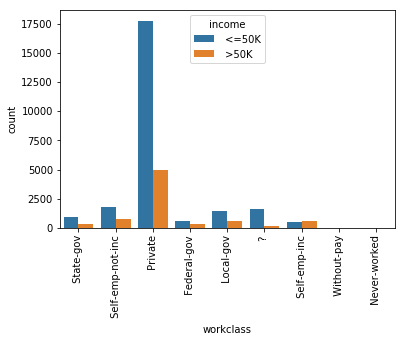

In [39]:
plt.xticks(rotation=90)
sns.countplot(
    data = df,
    x = 'workclass',
    hue = 'income'
)

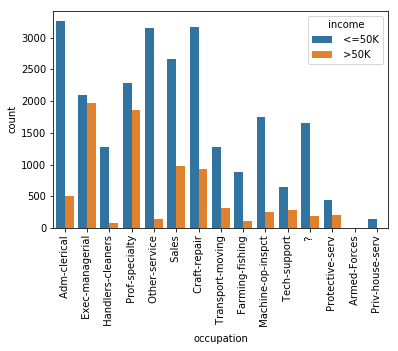

In [40]:
plt.xticks(rotation=90)
sns.countplot(
    data = df,
    x = 'occupation',
    hue = 'income'
)

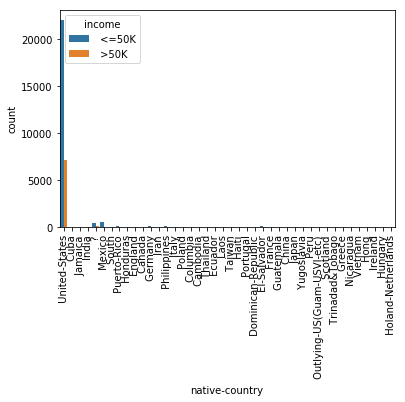

In [41]:
plt.xticks(rotation=90)
sns.countplot(
    data = df,
    x = 'native-country',
    hue = 'income'
)

In [42]:
X = X.drop(['workclass', 'occupation', 'native-country', 'capital-gain'], axis=1)

## Defining the Pipeline 

In [43]:
from sklearn.base import TransformerMixin

class ToNaN(TransformerMixin):
    def fit(self, X): return self
    
    def transform(self, X):
        return X.replace({' ?': np.nan})

In [44]:
class ToCleaned(TransformerMixin):
    def fit(self, X): return self
    
    def transform(self, X):
        return X.dropna(axis=0)

In [45]:
class ToEncoded(TransformerMixin):
    def fit(self, X):
        labels = X.select_dtypes(include=['O']).columns
        self.encoders = { c: LabelEncoder().fit(X[c]) for c in labels }
        return self
    
    def transform(self, X):
        for c in self.encoders:
            X[c] = self.encoders[c].transform(X[c])
        
        return X

In [46]:
class ToScaled(TransformerMixin):       
    def fit(self, X):
        self.scaler = StandardScaler()
        self.scaler.fit(X.astype(float))
        
        return self
    
    def transform(self, X):
        df = pd.DataFrame(
            self.scaler.transform(X),
            columns = X.columns
        )
        
        df['income'] = X['income']
        return df

In [47]:
class ToSelected(TransformerMixin):
    def fit(self, X): return self
    
    def transform(self, X):
        return X.drop(['workclass', 'occupation', 'native-country', 'capital-gain'], axis=1)

In [48]:
from sklearn.pipeline import Pipeline

adult_pipeline = Pipeline([
    ('SelectFeatures', ToSelected()),
    ('ReplaceNaN', ToNaN()),
    ('RemoveNaN', ToCleaned()),
    ('EncodeNumeric', ToEncoded()),
    ('ScaleNumeric', ToScaled())
])

## Data Preparation

In [49]:
adult_df = adult_pipeline.fit_transform(df)
adult_df.sample(6)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  # Remove the CWD from sys.path while we load stuff.


,age,fnlwgt,education,education-num,marital-status,relationship,race,sex,capital-loss,hours-per-week,income
16769,-1.142331,0.243155,1.214869,-0.031360,0.921634,-0.277805,0.393668,0.703071,-0.21666,-2.060174,0
30977,0.397233,0.559911,-0.335437,1.134739,-1.734058,-0.277805,0.393668,0.703071,-0.21666,0.774468,0
7084,0.397233,0.609840,0.439716,1.523438,-0.406212,-0.900181,0.393668,0.703071,-0.21666,-0.035429,1
25626,-1.215643,0.193150,1.214869,-0.031360,0.921634,-0.277805,0.393668,0.703071,-0.21666,-0.035429,0
4282,-0.555830,1.098204,1.214869,-0.031360,-0.406212,2.211698,-1.962621,-1.422331,-0.21666,-0.035429,0
2900,0.617171,3.636292,0.181332,-0.420060,-0.406212,-0.900181,0.393668,0.703071,-0.21666,0.612489,1


In [50]:
X = adult_df.drop('income', axis=1)
y = adult_df['income']

train_X, test_X, train_y, test_y = train_test_split(
    X,
    y,
    test_size = 0.3,
    random_state = 2
)

## Modelling


In [51]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(
    max_depth = 9
)

model.fit(train_X, train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Prediction

In [198]:
predicted_y = model.predict(test_X)
predicted_y[:5]

array([0, 0, 1, 0, 0])

## Evaluation

In [23]:
from sklearn.metrics import confusion_matrix, classification_report

In [199]:
confusion_matrix(test_y, predicted_y)

array([[6763,  597],
       [1089, 1320]])

In [68]:
l = adult_pipeline.steps[3][1].encoders['income'].classes_

print(classification_report(test_y, model.predict(test_X)))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      7360
           1       0.69      0.54      0.61      2409

   micro avg       0.83      0.83      0.83      9769
   macro avg       0.77      0.73      0.75      9769
weighted avg       0.82      0.83      0.82      9769



In [64]:
help(classification_report)

Help on function classification_report in module sklearn.metrics.classification:

classification_report(y_true, y_pred, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False)
    Build a text report showing the main classification metrics
    
    Read more in the :ref:`User Guide <classification_report>`.
    
    Parameters
    ----------
    y_true : 1d array-like, or label indicator array / sparse matrix
        Ground truth (correct) target values.
    
    y_pred : 1d array-like, or label indicator array / sparse matrix
        Estimated targets as returned by a classifier.
    
    labels : array, shape = [n_labels]
        Optional list of label indices to include in the report.
    
    target_names : list of strings
        Optional display names matching the labels (same order).
    
    sample_weight : array-like of shape = [n_samples], optional
        Sample weights.
    
    digits : int
        Number of digits for formatting output floating po

## Improvements

In [204]:
from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier(
     max_depth = 7,
     n_estimators = 20,
     class_weight = {0:1, 1:1}
)

model.fit(train_X, train_y)

RandomForestClassifier(bootstrap=True, class_weight={0: 1, 1: 1},
            criterion='gini', max_depth=7, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=20, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [205]:
print(classification_report(test_y, model.predict(test_X)))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7360
           1       0.73      0.46      0.57      2409

   micro avg       0.83      0.83      0.83      9769
   macro avg       0.79      0.70      0.73      9769
weighted avg       0.82      0.83      0.81      9769



In [211]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth': [5,9,15], 
          'n_estimators': [10, 50, 100, 150]}

model = GridSearchCV(
    RandomForestClassifier(class_weight = {0:1, 1:1}),
    params,
    scoring = 'f1_macro'
)

model.fit(X, y)
model.best_estimator_

/Users/mjburgess/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight={0: 1, 1: 1},
            criterion='gini', max_depth=15, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=150, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [212]:
print(classification_report(test_y, model.best_estimator_.predict(test_X)))

              precision    recall  f1-score   support

           0       0.90      0.95      0.93      7360
           1       0.82      0.69      0.75      2409

   micro avg       0.89      0.89      0.89      9769
   macro avg       0.86      0.82      0.84      9769
weighted avg       0.88      0.89      0.88      9769

